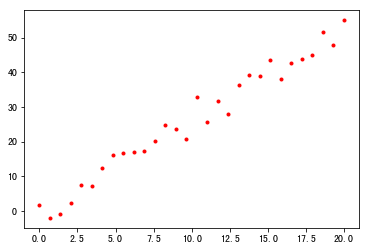

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Make sure to add the following line for using jupyter notebook
%matplotlib inline

tb_logdir = "/tmp/tf_tutorial/02_LinearRegression"

#Data parameters
n_samples = 30
data_W = 2.66
data_B = 0.13

#Generate data using numpy
data_X = (np.linspace(0, 20, n_samples, dtype='float32'))
data_Y = (data_W*data_X + data_B).astype('float32') + np.random.normal(0, 3, n_samples)
plt.plot(data_X, data_Y, 'r.', label='Original data')

In [2]:
#Training parameters
learning_rate = 1e-3
total_epochs = 100

X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
W = tf.Variable(1.0, name='weight')
b = tf.Variable(1.0, name='bias')

#name scopes are for tensorboard visualization
with tf.name_scope("Model"):
    predict_Y = W*X+b
with tf.name_scope("Loss"):
    loss = tf.reduce_sum(tf.square(predict_Y-Y)/n_samples, name='loss')
with tf.name_scope("SGD"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#must initialize all variables beforehand
init = tf.global_variables_initializer()
#add loss scalar to tensorboard
tf.summary.scalar("loss_summary", loss)
#merge all tensorboard operations to one, so later we can simply call merged_summary_op for every summary operations.
merged_summary_op = tf.summary.merge_all()

epoch 0 182.39218139648438
epoch 1 100.49810028076172
epoch 2 57.18356704711914
epoch 98 8.48425579071045
epoch 99 8.483558654785156
Training Complete!
Final loss: 8.483558654785156
Predicted W: 2.55  data_W: 2.66
Predicted B: 1.03  data_B: 0.13


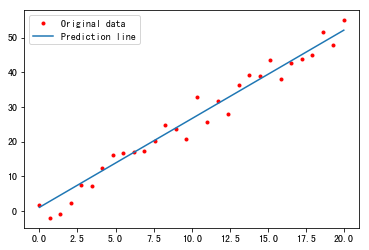

Starting tensorboard... 
Open http://0.0.0.0:6006/ for viewing.


0

In [3]:
with tf.Session() as sess:
    #Running global_variables_initializer()
    sess.run(init)
    #Setting where to save the tensorboard data.
    train_writer = tf.summary.FileWriter(tb_logdir, graph=tf.get_default_graph())
    for epoch in range(total_epochs):
        #Running multi operations at once that uses same data.
        #merged_summary_op returns a summary while optimizer returns None.
        summary, o = sess.run([merged_summary_op, optimizer], feed_dict={X:data_X, Y:data_Y})
        train_writer.add_summary(summary, epoch)
        if (epoch < 3 or epoch > total_epochs - 3):
            print("epoch {} {}".format(epoch, sess.run(loss, feed_dict={X:data_X, Y:data_Y})))
    print("Training Complete!")
    print("Final loss: {}".format(sess.run(loss, feed_dict={X:data_X, Y:data_Y})))
    print("Predicted W: {:.2f}  data_W: {}".format(sess.run(W), data_W))
    print("Predicted B: {:.2f}  data_B: {}".format(sess.run(b), data_B))
    plt.plot(data_X, data_Y, 'r.', label='Original data')
    plt.plot(data_X, sess.run(W)*data_X+sess.run(b), label='Prediction line')
    plt.legend()
    plt.show()

print("Starting tensorboard...")
print("Open http://0.0.0.0:6006/ for viewing.")
os.system("tensorboard --logdir={}".format(tb_logdir))
#Notice that multiple summary events may cause chaos on tensorboard, you can simple delete the old events.